In [1]:
from tensorflow import keras

#### 데이터 수집 및 전처리, 분리하기

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_input.shape, test_input.shape, train_target.shape, test_target.shape

train_scaled = train_input / 255.0
train_scaled.shape

from sklearn.model_selection import train_test_split
train_scaled, val_sclaed, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
train_scaled.shape, val_sclaed.shape, train_target.shape, val_target.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

#### 모델 및 계층을 생성하는 함수

In [3]:
def model_fn(a_layer=None):
    # 모델생성
    model = keras.Sequential()
    
    # 전처리 계층
    model.add(keras.layers.Flatten(input_shape = (28,28)))
    
    # 은닉층
    model.add(keras.layers.Dense(100, activation='relu'))
    
    # 추가할 계층이 있는 경우 아래 적용됨
    # - 추가성능을 위래 추가할 계층이 있는 경우 사용
    if a_layer:
        model.add(a_layer)
        
    #출력층
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    # 모델 반환
    return model

#### epoch 5로 모델 훈련

In [5]:
model5 = model_fn()
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
model5.compile(loss='sparse_categorical_crossentropy',
             metrics='accuracy')

In [7]:
history5 = model5.fit(train_scaled, train_target, epochs=5)
history5

Epoch 1/5
1500/1500 [==============================] - 1s 564us/step - loss: 0.5277 - accuracy: 0.8151
Epoch 2/5
1500/1500 [==============================] - 1s 545us/step - loss: 0.3915 - accuracy: 0.8590
Epoch 3/5
1500/1500 [==============================] - 1s 535us/step - loss: 0.3530 - accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 1s 540us/step - loss: 0.3336 - accuracy: 0.8786
Epoch 5/5
1500/1500 [==============================] - 1s 537us/step - loss: 0.3196 - accuracy: 0.8858


#### 훈련반복횟수

In [8]:
print(history5.epoch)

[0, 1, 2, 3, 4]


#### 훈련 결과 전체

In [10]:
print(history5.history)

{'loss': [0.5277144908905029, 0.39152196049690247, 0.35303372144699097, 0.3335891664028168, 0.31957730650901794], 'accuracy': [0.8150625228881836, 0.859041690826416, 0.8727499842643738, 0.8786041736602783, 0.8858333230018616]}


#### 훈련 결과 딕셔너리

In [11]:
print(history5.history.keys())

dict_keys(['loss', 'accuracy'])


#### 훈련 및 검증 결과를 동시에 추출
#### - verbose : 출력 옵션(1은 손실과 정확도 모두 보여주기, 0은 출력결과 안 보여주기)

In [12]:
# 
history5 = model5.fit(train_scaled,train_target,
                      epochs=5, 
                      verbose=1,
                     validation_data=(val_sclaed, val_target))

Epoch 1/5
1500/1500 [==============================] - 1s 684us/step - loss: 0.3105 - accuracy: 0.8900 - val_loss: 0.3545 - val_accuracy: 0.8815
Epoch 2/5
1500/1500 [==============================] - 1s 629us/step - loss: 0.3015 - accuracy: 0.8910 - val_loss: 0.3563 - val_accuracy: 0.8772
Epoch 3/5
1500/1500 [==============================] - 1s 613us/step - loss: 0.2905 - accuracy: 0.8971 - val_loss: 0.3592 - val_accuracy: 0.8837
Epoch 4/5
1500/1500 [==============================] - 1s 624us/step - loss: 0.2865 - accuracy: 0.8995 - val_loss: 0.3682 - val_accuracy: 0.8808
Epoch 5/5
1500/1500 [==============================] - 1s 617us/step - loss: 0.2806 - accuracy: 0.9021 - val_loss: 0.3622 - val_accuracy: 0.8841


In [14]:
history5.history

{'loss': [0.31047284603118896,
  0.30152836441993713,
  0.2904675304889679,
  0.28654366731643677,
  0.28061535954475403],
 'accuracy': [0.8900416493415833,
  0.890958309173584,
  0.8971041440963745,
  0.8995208144187927,
  0.9020624756813049],
 'val_loss': [0.3544800579547882,
  0.3562726676464081,
  0.3591630160808563,
  0.3681822121143341,
  0.36219465732574463],
 'val_accuracy': [0.8815000057220459,
  0.8771666884422302,
  0.8836666941642761,
  0.8807500004768372,
  0.8840833306312561]}

In [15]:
history5.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 모델성능을 시각화

In [16]:
import matplotlib.pyplot as plt


#### 훈련 및 검증 손실곡선 그리기 - epoch와 loss가 가까운 지점을 좋은 지점으로 평가

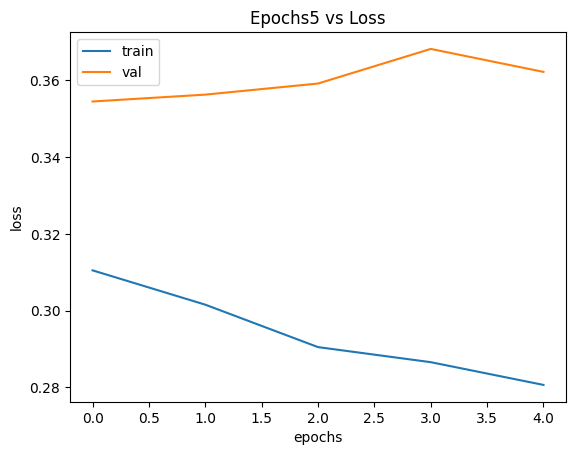

In [18]:
plt.plot(history5.history["loss"])
plt.plot(history5.history["val_loss"])

plt.title("Epochs5 vs Loss")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.legend(['train','val'])
plt.show()

#### 훈련 및 검증 정확도곡선 그리기

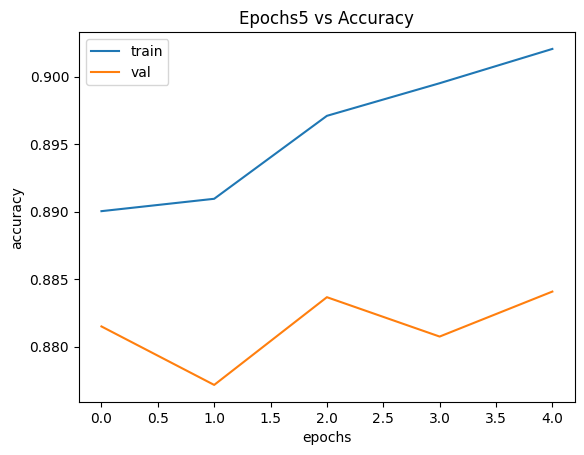

In [19]:
plt.plot(history5.history["accuracy"])
plt.plot(history5.history["val_accuracy"])

plt.title("Epochs5 vs Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.legend(['train','val'])
plt.show()